## Reading Data

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
import pandas.io.sql as pds
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from mlxtend.frequent_patterns import apriori,association_rules

In [2]:
data1 = pd.read_excel("online_retail_II.xlsx",sheet_name = ['Year 2009-2010','Year 2010-2011'])

In [3]:
# Combining the data in both the sheets into one dataset
data = pd.concat([data1['Year 2009-2010'],data1['Year 2010-2011']]).reset_index(drop=True)
data['CustomerID'] = data['Customer ID']
data.drop('Customer ID',axis=1,inplace=True)

In [4]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country,CustomerID
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,United Kingdom,13085.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom,13085.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom,13085.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,United Kingdom,13085.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,United Kingdom,13085.0
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,12680.0
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,12680.0
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France,12680.0
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,France,12680.0


## Data Cleaning 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Country      1067371 non-null  object        
 7   CustomerID   824364 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [7]:
#for i in range(0,len(data)):
 #   if len(data['StockCode'][i]) != 5:
  #      print(data['StockCode'][i])

In [8]:
len(data['StockCode'][1])

6

In [9]:
len(data['CustomerID'].unique())

5943

In [10]:
data.dropna(inplace=True)
data.reset_index(drop=True,inplace=True)

In [11]:
data.describe()

,Quantity,Price,CustomerID
count,824364.000000,824364.000000,824364.000000
mean,12.414574,3.676800,15324.638504
std,188.976099,70.241388,1697.464450
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13975.000000
50%,5.000000,1.950000,15255.000000
75%,12.000000,3.750000,16797.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
# Dropping the rows where quantity is negative
data = data[data['Quantity'] >= 0]

In [13]:
data.describe()

,Quantity,Price,CustomerID
count,805620.000000,805620.000000,805620.000000
mean,13.307665,3.206279,15331.856250
std,144.306739,29.197901,1696.768395
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13982.000000
50%,5.000000,1.950000,15271.000000
75%,12.000000,3.750000,16805.000000
max,80995.000000,10953.500000,18287.000000


In [14]:
data[data['Price'] == 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country,CustomerID
3754,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,United Kingdom,16126.0
4889,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,United Kingdom,15658.0
12998,490727,M,Manual,1,2009-12-07 16:38:00,0.0,United Kingdom,17231.0
14558,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,United Kingdom,14108.0
14559,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,United Kingdom,14108.0
...,...,...,...,...,...,...,...,...
778388,577129,22464,HANGING METAL HEART LANTERN,4,2011-11-17 19:52:00,0.0,United Kingdom,15602.0
778766,577168,M,Manual,1,2011-11-18 10:42:00,0.0,Germany,12603.0
779842,577314,23407,SET OF 2 TRAYS HOME SWEET HOME,2,2011-11-18 13:23:00,0.0,Norway,12444.0
784382,577696,M,Manual,1,2011-11-21 11:57:00,0.0,United Kingdom,16406.0


In [15]:
data = data[data['Country'] == 'United Kingdom']

## Data Analysis

In [16]:
con = sql.connect("retail.db")
con.execute("DROP TABLE retail")
data.to_sql("retail",con) 

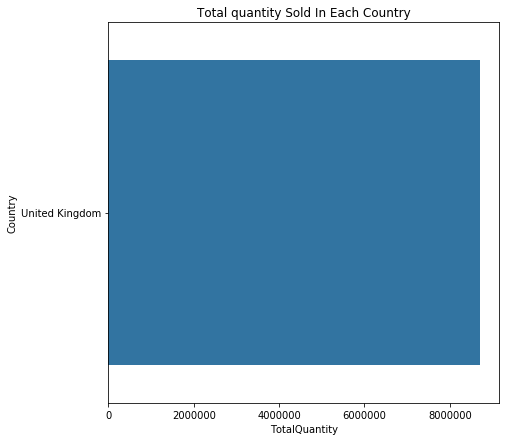

In [17]:
temp = pds.read_sql("SELECT SUM(Quantity) AS TotalQuantity,Country FROM retail GROUP BY Country ORDER BY TotalQuantity DESC",con)
plt.figure(figsize = (7,7))
sns.barplot(y ='Country',x = 'TotalQuantity',data = temp)
plt.title('Total quantity Sold In Each Country')
plt.show()

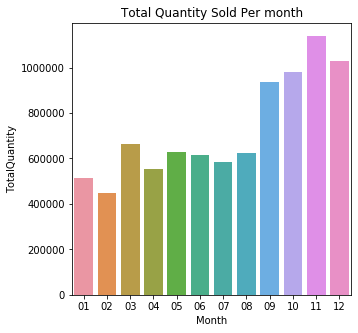

In [18]:
temp = pds.read_sql("SELECT strftime('%m', InvoiceDate) AS Month, SUM(Quantity) AS TotalQuantity FROM RETAIL GROUP BY Month ORDER BY TotalQuantity DESC",con)
plt.figure(figsize=(5,5))
sns.barplot(y = 'TotalQuantity',x = 'Month',data = temp)
plt.title("Total Quantity Sold Per month")
plt.show()

Most quantity of items were bought during the month of November

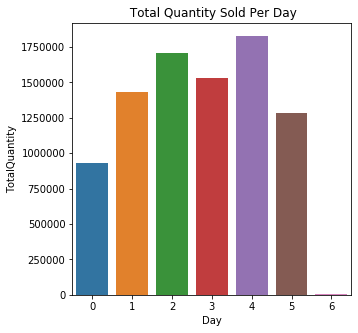

In [19]:
temp = pds.read_sql("SELECT strftime('%w', InvoiceDate) AS Day, Total(Quantity) AS TotalQuantity FROM RETAIL GROUP BY Day ORDER BY TotalQuantity DESC",con)
plt.figure(figsize=(5,5))
sns.barplot(y = 'TotalQuantity',x = 'Day',data = temp)
plt.title(" Total Quantity Sold Per Day")
plt.show()

Most quantity of items were bought on Thursday

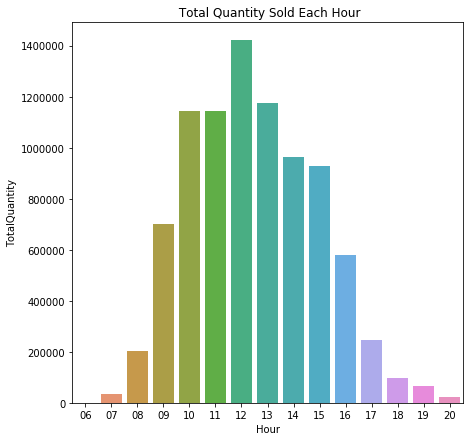

In [20]:
temp = pds.read_sql("SELECT strftime('%H', InvoiceDate) AS Hour, SUM(Quantity) AS TotalQuantity FROM RETAIL GROUP BY Hour ORDER BY TotalQuantity DESC",con)
plt.figure(figsize=(7,7))
sns.barplot(y = 'TotalQuantity',x = 'Hour',data = temp)
plt.title(" Total Quantity Sold Each Hour")
plt.show()

Most quantity of items were bought between 12 pm and 1 pm

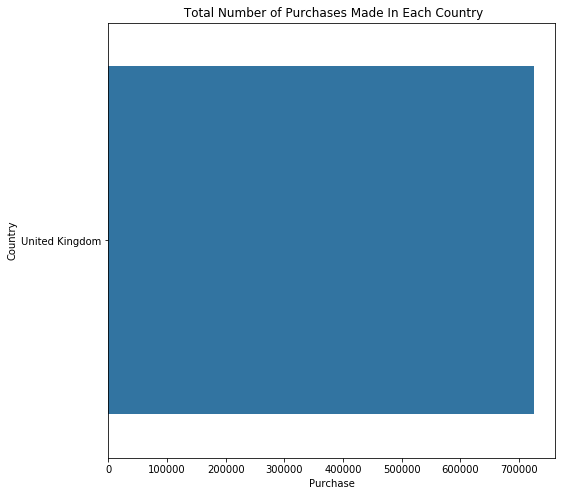

In [21]:
temp = pds.read_sql("SELECT COUNT(Invoice) AS Purchase,Country FROM retail GROUP BY Country ORDER BY Purchase DESC",con)
plt.figure(figsize = (8,8))
sns.barplot(y ='Country',x = 'Purchase',data = temp) #data = temp[temp['Order_'] > 100]) 
plt.title(" Total Number of Purchases Made In Each Country")
plt.show()

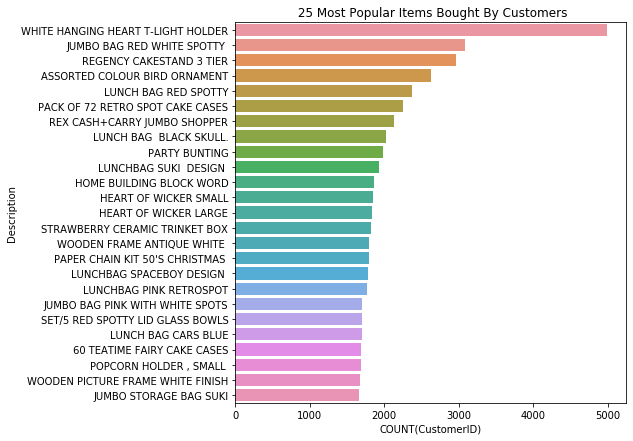

In [22]:
temp = pds.read_sql("SELECT COUNT(CustomerID),Description, StockCode FROM retail GROUP BY StockCode ORDER BY COUNT(CustomerID) DESC ",con)
plt.figure(figsize = (7,7))
sns.barplot(y = 'Description',x = 'COUNT(CustomerID)',data = temp.iloc[0:25,])
plt.title(" 25 Most Popular Items Bought By Customers")
plt.show()

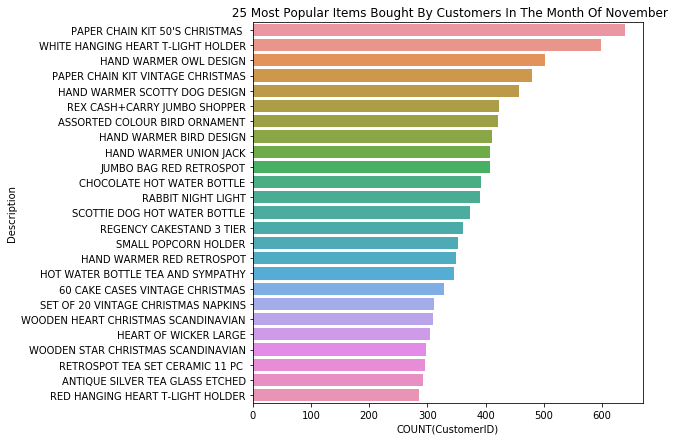

In [23]:
temp = pds.read_sql("SELECT strftime('%m', InvoiceDate) AS Month,COUNT(CustomerID),Description, StockCode FROM retail WHERE Month = '11'  GROUP BY StockCode ORDER BY COUNT(CustomerID) DESC ",con)
plt.figure(figsize = (7,7))
sns.barplot(y = 'Description',x = 'COUNT(CustomerID)',data = temp.iloc[0:25,])
plt.title(" 25 Most Popular Items Bought By Customers In The Month Of November")
plt.show()

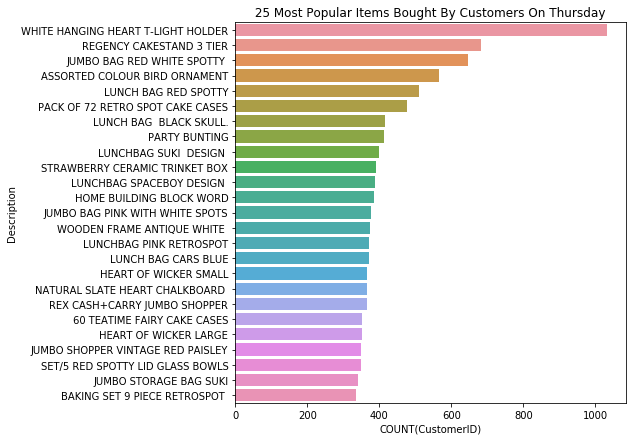

In [24]:
temp = pds.read_sql("SELECT strftime('%w', InvoiceDate) AS Day,COUNT(CustomerID),Description, StockCode FROM retail WHERE Day = '4'  GROUP BY StockCode ORDER BY COUNT(CustomerID) DESC ",con)
plt.figure(figsize = (7,7))
sns.barplot(y = 'Description',x = 'COUNT(CustomerID)',data = temp.iloc[0:25,])
plt.title(" 25 Most Popular Items Bought By Customers On Thursday ")
plt.show()

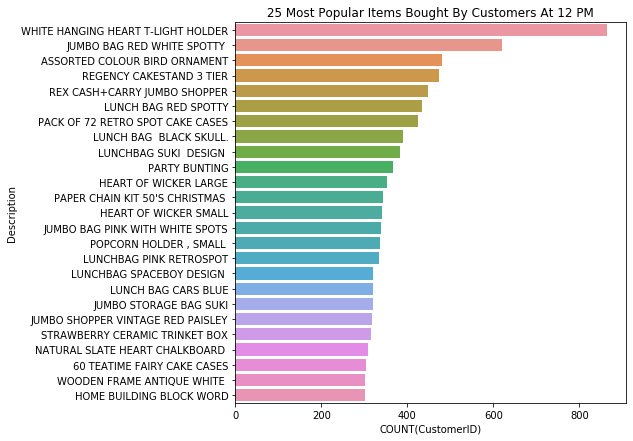

In [25]:
temp = pds.read_sql("SELECT strftime('%H', InvoiceDate) AS Hour,COUNT(CustomerID),Description, StockCode FROM retail WHERE Hour = '12'  GROUP BY StockCode ORDER BY COUNT(CustomerID) DESC ",con)
plt.figure(figsize = (7,7))
sns.barplot(y = 'Description',x = 'COUNT(CustomerID)',data = temp.iloc[0:25,])
plt.title(" 25 Most Popular Items Bought By Customers At 12 PM ")
plt.show()

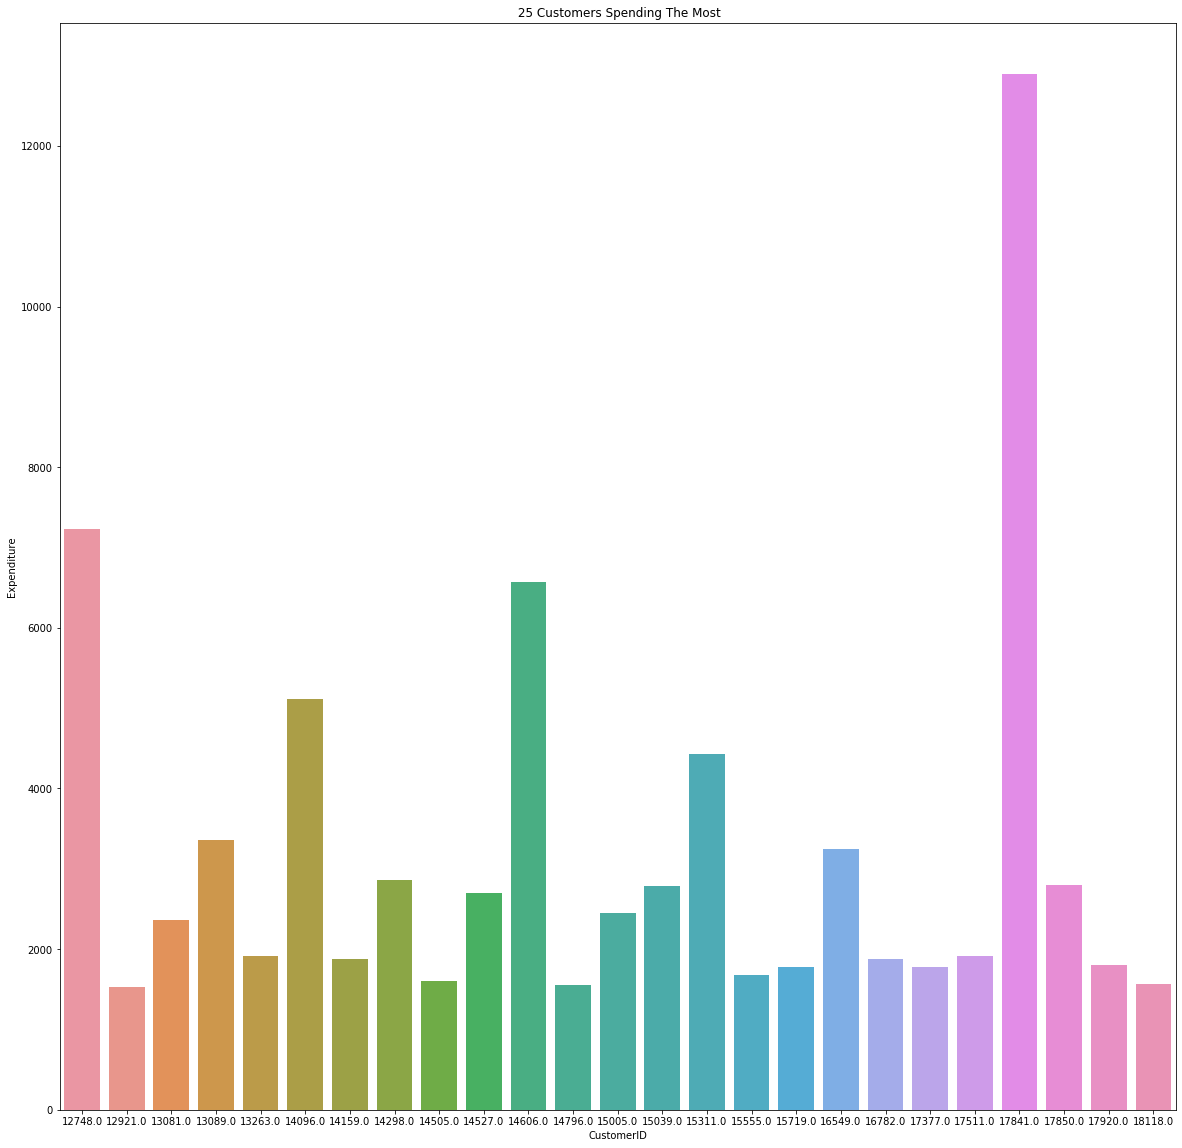

In [26]:
temp = pds.read_sql("SELECT CustomerID, COUNT(Quantity*Price) AS Expenditure FROM retail GROUP BY CustomerID ORDER BY Expenditure DESC",con)
plt.figure(figsize=(20,20))
sns.barplot(y = 'Expenditure', x = 'CustomerID', data = temp.iloc[0:25,])
plt.title(" 25 Customers Spending The Most")
plt.show()

Customer with ID 17841 has spent the most 

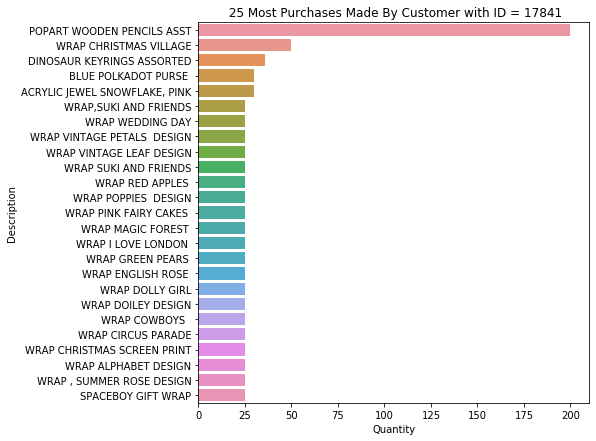

In [27]:
temp = pds.read_sql(" SELECT Description, Quantity FROM retail WHERE CustomerID = 17841 GROUP BY Description ORDER BY Quantity DESC",con)
plt.figure(figsize = (7,7))
sns.barplot(x = 'Quantity',y = 'Description',data = temp.iloc[0:25,])
plt.title(" 25 Most Purchases Made By Customer with ID = 17841")
plt.show()

In [28]:
data['Price'].describe()

count    725296.000000
mean          3.056583
std          25.164725
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       10953.500000
Name: Price, dtype: float64

75% of the items have price less than 3.75 units 

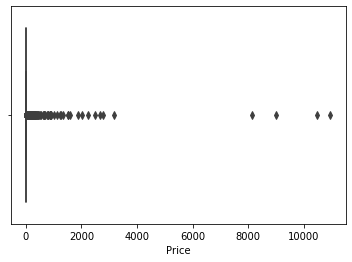

In [29]:
sns.boxplot(data['Price'])
plt.show()

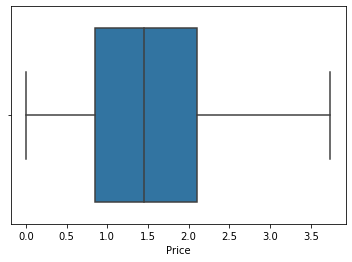

In [30]:
sns.boxplot(data['Price'][data['Price']<3.75])
plt.show()

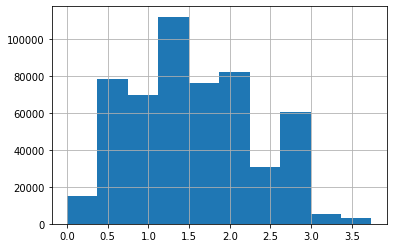

In [31]:
data['Price'][data['Price'] < 3.75].hist()

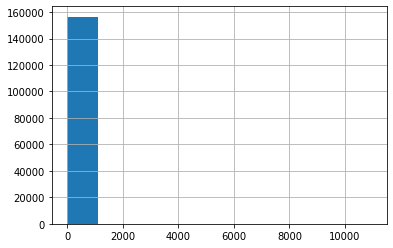

In [32]:
data['Price'][data['Price'] > 3.75].hist()

In [33]:
temp = pds.read_sql("SELECT Description, Price FROM retail WHERE Price > 3.75 ORDER BY Price DESC",con)
temp

,Description,Price
0,Manual,10953.50
1,Manual,10468.80
2,Manual,8985.60
3,POSTAGE,8142.75
4,Manual,3155.95
...,...,...
156536,SET/3 VANILLA SCENTED CANDLE IN BOX,3.81
156537,SET/3 VANILLA SCENTED CANDLE IN BOX,3.81
156538,SET/3 OCEAN SCENT CANDLE JEWEL BOX,3.81
156539,SET/3 ROSE CANDLE IN JEWELLED BOX,3.81


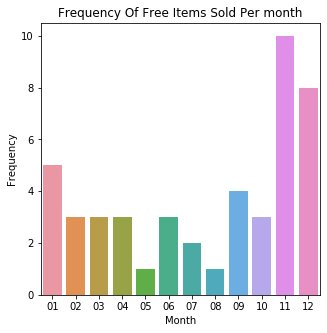

In [34]:
temp = pds.read_sql("SELECT strftime('%m', InvoiceDate) AS Month, COUNT(Price) AS Frequency FROM RETAIL WHERE Price = 0 GROUP BY Month ORDER BY Frequency DESC",con)
plt.figure(figsize=(5,5))
sns.barplot(y = 'Frequency',x = 'Month',data = temp)
plt.title("Frequency Of Free Items Sold Per month")
plt.show()

## Creating Customer Basket

In [35]:
# Creating a Pivot Table 
basket = data.pivot_table(values = 'Quantity', columns = 'Description', index = 'Invoice',aggfunc = np.sum).fillna(0)

In [36]:
#
basket = basket.applymap(lambda x : 1 if x>0 else 0)

In [37]:
# 
basket = basket[(basket > 0).sum(axis=1) >=2]

## Applying Apriori Algorithm

In [38]:
frequent_items = apriori(basket,min_support = 0.025, use_colnames = True).sort_values('support',ascending = False).reset_index(drop=True)

In [39]:
frequent_items

,support,itemsets
0,0.151016,(WHITE HANGING HEART T-LIGHT HOLDER)
1,0.091207,(REGENCY CAKESTAND 3 TIER)
2,0.080947,(ASSORTED COLOUR BIRD ORNAMENT)
3,0.076823,(JUMBO BAG RED RETROSPOT)
4,0.062277,(PARTY BUNTING)
...,...,...
110,0.025261,(HAND WARMER UNION JACK)
111,0.025132,(PARTY METAL SIGN )
112,0.025067,(HOT WATER BOTTLE I AM SO POORLY)
113,0.025034,(CREAM SWEETHEART MINI CHEST)


In [40]:
association_rules(frequent_items,metric = 'lift').sort_values('lift',ascending = False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE ),0.052114,0.055685,0.031560,0.605607,10.875510,0.028659,2.394352
1,(WOODEN FRAME ANTIQUE WHITE ),(WOODEN PICTURE FRAME WHITE FINISH),0.055685,0.052114,0.031560,0.566764,10.875510,0.028659,2.187920
2,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.055750,0.055848,0.027762,0.497962,8.916407,0.024648,1.880637
3,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.055848,0.055750,0.027762,0.497093,8.916407,0.024648,1.877583
4,(WHITE HANGING HEART T-LIGHT HOLDER),(RED HANGING HEART T-LIGHT HOLDER),0.151016,0.050198,0.035522,0.235218,4.685803,0.027941,1.241925
5,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.050198,0.151016,0.035522,0.707633,4.685803,0.027941,2.903825


## Clustering Customers


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725296 entries, 0 to 824347
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      725296 non-null  object        
 1   StockCode    725296 non-null  object        
 2   Description  725296 non-null  object        
 3   Quantity     725296 non-null  int64         
 4   InvoiceDate  725296 non-null  datetime64[ns]
 5   Price        725296 non-null  float64       
 6   Country      725296 non-null  object        
 7   CustomerID   725296 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 49.8+ MB


There are no null values in Customer ID.

In [47]:
# Creating a column with the total amount spent
data['Amount'] = data['Quantity'] * data['Price']

In [63]:
# Creating a dataframe with unique customer IDs and the total amount they have spent
customer = data.groupby('CustomerID')['Amount'].sum()
customer = customer.reset_index()
customer

,CustomerID,Amount
0,12346.0,77556.46
1,12608.0,415.79
2,12745.0,723.85
3,12746.0,254.55
4,12747.0,9276.54
...,...,...
5348,18283.0,2736.65
5349,18284.0,461.68
5350,18285.0,427.00
5351,18286.0,1296.43


In [64]:
# Finding out the frequency of each customer visit to the store
freq = data.groupby('CustomerID')['Invoice'].count()
freq = freq.reset_index()
freq

,CustomerID,Invoice
0,12346.0,34
1,12608.0,16
2,12745.0,22
3,12746.0,17
4,12747.0,257
...,...,...
5348,18283.0,986
5349,18284.0,28
5350,18285.0,12
5351,18286.0,67


In [80]:
# Merging both dataframes on CustomerID
customer_det = pd.merge(freq,customer,on = 'CustomerID')
customer_det

,CustomerID,Invoice,Amount
0,12346.0,34,77556.46
1,12608.0,16,415.79
2,12745.0,22,723.85
3,12746.0,17,254.55
4,12747.0,257,9276.54
...,...,...,...
5348,18283.0,986,2736.65
5349,18284.0,28,461.68
5350,18285.0,12,427.00
5351,18286.0,67,1296.43


In [84]:
customer_det.describe()

,CustomerID,Invoice,Amount
count,5353.000000,5353.000000,5353.000000
mean,15556.524566,135.493368,2750.447883
std,1581.187812,325.997871,12077.255964
min,12346.000000,1.000000,0.000000
25%,14190.000000,20.000000,335.520000
50%,15564.000000,53.000000,848.710000
75%,16922.000000,142.000000,2212.280000
max,18287.000000,12890.000000,608821.650000


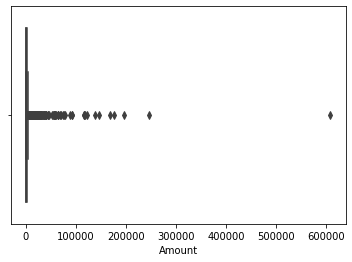

In [72]:
sns.boxplot(customer_det['Amount'])
plt.show()

There are a lot of outliers present.

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(customer_det.drop('CustomerID',axis=1)) 
scaled = pd.DataFrame(scaled,columns = ['Invoice','Amount'])
scaled

In [95]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
scores = []
silhouette = {}
for i in range(2,10):
    kmeans = KMeans(n_clusters = i, max_iter = 40).fit(scaled)
    cluster_labels = kmeans.labels_
    silhouette[i] = silhouette_score(scaled,cluster_labels)
    scores.append(kmeans.inertia_)

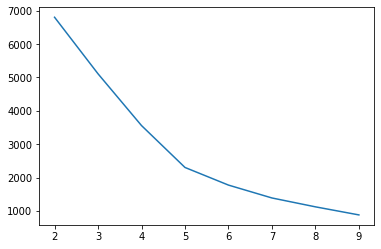

In [96]:
plt.plot(range(2,10,1), scores)

In [97]:
silhouette

{2: 0.9604823432834292,
 3: 0.954516872303037,
 4: 0.8589329244403713,
 5: 0.8058260360436921,
 6: 0.7070876559721815,
 7: 0.7022828787825602,
 8: 0.6967098373059339,
 9: 0.6986667985637257}

In [99]:
# Final Model

kmeans = KMeans(n_clusters = 2).fit(scaled)
cluster_labels = kmeans.labels_
customer_det['Cluster'] = cluster_labels

In [103]:
customer_det[customer_det['Cluster']==1] 

,CustomerID,Invoice,Amount,Cluster
5,12748.0,7230,56599.39,1
262,13081.0,2358,59205.15,1
270,13089.0,3363,116737.86,1
858,13694.0,1525,196482.81,1
1246,14096.0,5111,65164.79,1
1444,14298.0,2864,91194.49,1
1744,14606.0,6566,30861.06,1
2159,15039.0,2792,40031.43,1
2181,15061.0,987,137818.52,1
2430,15311.0,4434,116771.16,1


In [104]:
customer_det[customer_det['Cluster']==0]

,CustomerID,Invoice,Amount,Cluster
0,12346.0,34,77556.46,0
1,12608.0,16,415.79,0
2,12745.0,22,723.85,0
3,12746.0,17,254.55,0
4,12747.0,257,9276.54,0
...,...,...,...,...
5348,18283.0,986,2736.65,0
5349,18284.0,28,461.68,0
5350,18285.0,12,427.00,0
5351,18286.0,67,1296.43,0


In [156]:
invoice_det = data.groupby('Invoice')['Quantity'].sum()
invoice_det = invoice_det.reset_index()

In [157]:
invoice_item = data.groupby('Invoice')['StockCode'].count()
invoice_item = invoice_item.reset_index()

In [158]:
invoice_amount = data.groupby('Invoice')['Amount'].sum()
invoice_amount = invoice_amount.reset_index()

In [159]:
invoice_1 = pd.merge(invoice_det,invoice_item, on = 'Invoice')
invoice = pd.merge(invoice_1,invoice_amount,on = 'Invoice')

In [160]:
invoice

,Invoice,Quantity,StockCode,Amount
0,489434,166,8,505.30
1,489435,60,4,145.80
2,489436,193,19,630.33
3,489437,145,23,310.75
4,489438,826,17,2286.24
...,...,...,...,...
33541,581582,18,2,29.88
33542,581583,76,2,124.60
33543,581584,120,2,140.64
33544,581585,278,21,329.05


In [161]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(invoice.drop(['Invoice','Amount'],axis=1)) 
scaled = pd.DataFrame(scaled,columns = ['Quantity','StockCode'])
scaled

,Quantity,StockCode
0,-0.100991,-0.559122
1,-0.214988,-0.723317
2,-0.071954,-0.107586
3,-0.123575,0.056609
4,0.608800,-0.189684
...,...,...
33541,-0.260156,-0.805415
33542,-0.197781,-0.805415
33543,-0.150461,-0.805415
33544,0.019458,-0.025489


In [162]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
scores = []
silhouette = {}
for i in range(2,10):
    kmeans = KMeans(n_clusters = i, max_iter = 40).fit(scaled)
    cluster_labels = kmeans.labels_
    silhouette[i] = silhouette_score(scaled,cluster_labels)
    scores.append(kmeans.inertia_) 

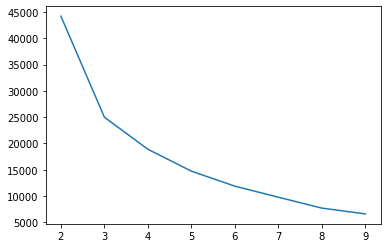

In [163]:
plt.plot(range(2,10,1),scores) 

In [164]:
silhouette

{2: 0.9862036450002458,
 3: 0.6663916369874595,
 4: 0.5722988492093594,
 5: 0.5743404185929059,
 6: 0.4951005453550455,
 7: 0.480601779549858,
 8: 0.4878647095670597,
 9: 0.46721708065313505}

In [165]:
# Final Model

kmeans = KMeans(n_clusters = 2).fit(scaled)
cluster_labels = kmeans.labels_
invoice['Cluster'] = cluster_labels 

In [166]:
invoice[invoice['Cluster']==1]

,Invoice,Quantity,StockCode,Amount,Cluster
4310,502269,40000,4,10000.00,1
12314,524174,87167,45,11880.84,1
18643,541431,74215,1,77183.60,1
33520,581483,80995,1,168469.60,1


In [147]:
invoice[invoice['Cluster']==0]

,Invoice,Quantity,StockCode,Amount,Cluster
0,489434,166,8,505.30,0
1,489435,60,4,145.80,0
2,489436,193,19,630.33,0
3,489437,145,23,310.75,0
4,489438,826,17,2286.24,0
...,...,...,...,...,...
33541,581582,18,2,29.88,0
33542,581583,76,2,124.60,0
33543,581584,120,2,140.64,0
33544,581585,278,21,329.05,0


In [153]:
data[data['Quantity'] > ].describe()

,Quantity,Price,CustomerID,Amount,Recency
count,7017.000000,7017.000000,7017.000000,7017.000000,7017
mean,330.815306,1.323226,15730.321362,385.636159,369 days 10:44:27.541684
std,1396.956738,1.433025,1730.346648,2271.179936,222 days 05:58:13.094006
min,115.000000,0.000000,12346.000000,0.000000,0 days 00:53:00
25%,144.000000,0.420000,13881.000000,93.600000,158 days 02:29:00
50%,200.000000,0.850000,15980.000000,201.600000,393 days 01:18:00
75%,300.000000,1.650000,17381.000000,367.200000,560 days 02:13:00
max,80995.000000,20.800000,18279.000000,168469.600000,738 days 02:03:00
